# SMS Spam Detection
    
    The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

    Acknowledgements

    The original dataset can be found in https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.


### 1. Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Dataset Loading and Data Preprocessing
#### 2.1. Read dataset using pandas

In [2]:
# enter here
sms = pd.read_csv('sms_spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### 2.2. Remove redundant attributes

In [3]:
# enter here
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2.3. Rename columns
Requires: v1 -> label, v2 -> message

In [4]:
# enter here
sms = sms.rename(columns = {'v1':'label','v2':'message'})
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2.4. Modify columns
Requires: change ham to 0, and spam to 1 in Label Attribute.

In [5]:
# enter here
sms = sms.replace(['ham', 'spam'],[0, 1])
sms.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### 2.5. Add new column
Requires: Add message_len Attribute that is the length of the message.

In [6]:
# enter here
sms['length'] = sms['message'].apply(len)
sms.head()
sms1 = sms.copy()

#### 2.6. Histogram graph

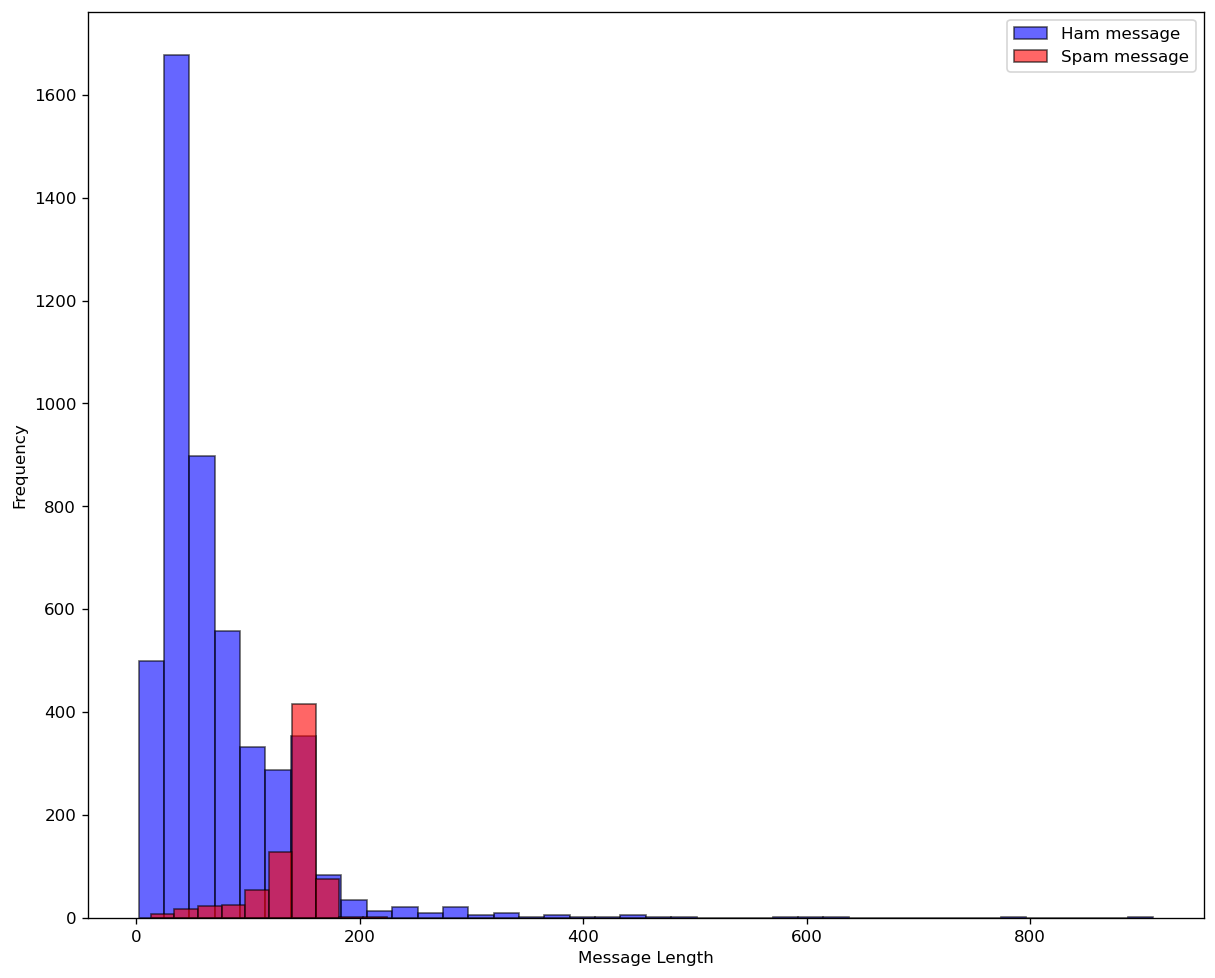

In [7]:
# enter here
plt.figure(figsize=(12,10),dpi=120)
sms[sms.label == 0].length.plot(bins=40, kind='hist',edgecolor='black', color='blue', label='Ham message', alpha=0.6)
sms[sms.label == 1].length.plot(kind='hist', color='red', edgecolor='black',label='Spam message', alpha=0.6)
plt.legend()
plt.xlabel("Message Length");


#### 2.7. Preprocessing text 
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text

In [8]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [9]:
# Apply the above function to preprocess the text.
# enter here
sms['message'] = sms['message'].apply(text_process)

sms['length'] = sms['message'].apply(len)

In [11]:
print(text_process(sms['message']))

Go jurong point crazy Available bugis n great world la e buffet Cine got amore watOk lar Joking wif oniFree entry wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questionstd txt rateTCs apply 08452810075over18sdun say early hor c already sayNah think goes usf lives around thoughFreeMsg Hey darling 3 weeks word back Id like fun still Tb ok XxX std chgs send å£150 rcvEven brother like speak treat like aids patentper request Melle Melle Oru Minnaminunginte Nurungu Vettam set callertune Callers Press 9 copy friends CallertuneWINNER valued network customer selected receivea å£900 prize reward claim call 09061701461 Claim code KL341 Valid 12 hoursmobile 11 months R entitled Update latest colour mobiles camera Free Call Mobile Update Co FREE 08002986030gonna home soon want talk stuff anymore tonight k Ive cried enough todaySIX chances win CASH 100 20000 pounds txt CSH11 send 87575 Cost 150pday 6days 16 TsandCs apply Reply HL infoURGENT 1 week FREE membership å£100000

In [10]:
sms

,label,message,length
0,0,Go jurong point crazy Available bugis n great ...,82
1,0,Ok lar Joking wif oni,21
2,1,Free entry wkly comp win FA Cup final tkts 21s...,133
3,0,dun say early hor c already say,31
4,0,Nah think goes usf lives around though,38
...,...,...,...
5567,1,2nd time tried contact å£750 Pound prize claim...,104
5568,0,Ì b going esplanade fr home,27
5569,0,Pity mood Soany suggestions,27
5570,0,guy bitching acted like id interested buying s...,82


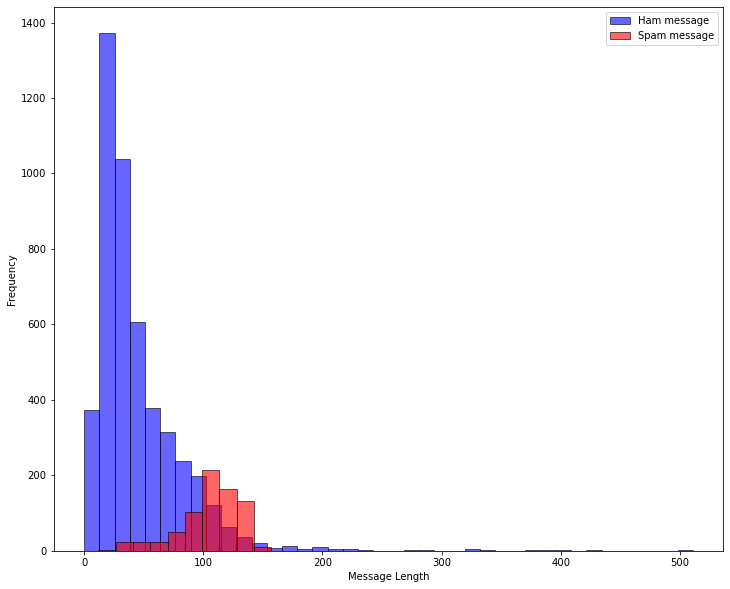

In [11]:
# Draw Histogram graph again with clean messages.
# enter here
plt.figure(figsize=(12,10))
sms[sms.label == 0].length.plot(bins=40, kind='hist',edgecolor='black', color='blue', label='Ham message', alpha=0.6)
sms[sms.label == 1].length.plot(kind='hist', color='red', edgecolor='black',label='Spam message', alpha=0.6)
plt.legend()
plt.xlabel("Message Length");


#### 2.8. Feature extraction using TfidfVectorizer

In [12]:
# enter here
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
features_tfid = tfid.fit_transform(sms['message']).toarray()
print(features_tfid)
print(features_tfid.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5572, 9371)


#### 2.9. Feature extraction using HashingVectorizer

In [13]:
# enter here
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=16)
features_hv = hv.fit_transform(sms['message']).toarray()
print(features_hv)
print(features_hv.shape)

[[ 0.35355339  0.          0.         ...  0.          0.35355339
  -0.35355339]
 [ 0.         -0.4472136   0.         ...  0.4472136   0.
   0.        ]
 [ 0.         -0.13608276  0.         ...  0.          0.13608276
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [-0.28867513  0.          0.         ...  0.          0.28867513
  -0.28867513]
 [-0.57735027  0.          0.57735027 ...  0.          0.57735027
   0.        ]]
(5572, 16)


#### 2.10. Feature extraction using CountVectorizer

In [14]:
# enter here
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
features_cv = cv.fit_transform(sms['message']).toarray()
print(features_cv)
print(features_cv.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5572, 9371)


#### 2.11. Your contributions

    Create clean_msg_2 with your text_process function. 
    Then, apply feature extraction using TfidfVectorizer, HashingVectorizer and CountVectorizer
    Compare the result with the default text_process function. 

In [44]:
import nltk
labels = sms1.values[:,0]
messages = sms1.values[:,1]
print(labels[0:10])
print(messages[0:10])

[0 0 1 0 0 1 0 0 1 1]
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
 'Even my brother is not like to speak with me. They treat me like aids patent.'
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours o

In [16]:
sentences = [nltk.word_tokenize(sent) for sent in messages]
print(sentences[0:10])

[['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...'], ['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...'], ['Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', '.', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 'T', '&', 'C', "'s", 'apply', '08452810075over18', "'s"], ['U', 'dun', 'say', 'so', 'early', 'hor', '...', 'U', 'c', 'already', 'then', 'say', '...'], ['Nah', 'I', 'do', "n't", 'think', 'he', 'goes', 'to', 'usf', ',', 'he', 'lives', 'around', 'here', 'though'], ['FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'r

In [17]:
from keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
print(tokenizer.word_index)

{'.': 1, 'i': 2, 'to': 3, 'you': 4, ',': 5, '?': 6, 'a': 7, '!': 8, 'the': 9, 'u': 10, '...': 11, 'and': 12, '&': 13, 'is': 14, 'in': 15, 'me': 16, ';': 17, 'my': 18, 'it': 19, ':': 20, 'for': 21, '..': 22, 'your': 23, 'of': 24, 'have': 25, 'call': 26, 'that': 27, 'do': 28, 'on': 29, ')': 30, "'s": 31, 'now': 32, 'are': 33, '2': 34, 'so': 35, 'not': 36, 'but': 37, 'or': 38, 'can': 39, 'at': 40, 'we': 41, "'m": 42, 'get': 43, 'if': 44, 'ur': 45, 'with': 46, 'be': 47, 'will': 48, 'just': 49, "n't": 50, 'no': 51, 'this': 52, 'gt': 53, 'lt': 54, '*': 55, 'up': 56, 'how': 57, 'when': 58, '4': 59, '#': 60, 'from': 61, 'what': 62, "''": 63, 'go': 64, 'free': 65, 'all': 66, 'out': 67, 'ok': 68, 'know': 69, 'got': 70, 'like': 71, 'was': 72, 'good': 73, 'then': 74, "'ll": 75, 'come': 76, '-': 77, 'there': 78, 'he': 79, 'am': 80, 'its': 81, 'time': 82, 'only': 83, 'day': 84, 'love': 85, 'want': 86, 'send': 87, 'text': 88, 'as': 89, 'one': 90, 'going': 91, 'by': 92, 'txt': 93, 'about': 94, 'need':

In [18]:
X_count = tokenizer.texts_to_matrix(sentences,mode='count')
print(X_count)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 1. 1. 0.]
 [0. 0. 2. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]]


In [19]:
X_tfidf = tokenizer.texts_to_matrix(sentences,mode='tfidf')
print(X_tfidf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.14546454 0.         ... 0.         0.         0.        ]
 ...
 [0.         1.14546454 0.         ... 7.93272103 7.93272103 0.        ]
 [0.         0.         2.24480342 ... 0.         0.         7.93272103]
 [0.         1.14546454 0.         ... 0.         0.         0.        ]]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_count, labels, test_size=0.3, random_state=101)

In [21]:
X_train = X_train.astype('int')
y_train = y_train.astype('int')
X_test = X_test.astype('int')
y_test = y_test.astype('int')

In [22]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
from sklearn.metrics import classification_report
model_tree.fit(X_train,y_train)
y_pred = model_tree.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9647129186602871
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1464
           1       0.86      0.86      0.86       208

    accuracy                           0.96      1672
   macro avg       0.92      0.92      0.92      1672
weighted avg       0.96      0.96      0.96      1672



### 3. Spam detection

In [24]:
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn import metrics
import time

y = sms.label

# only using the decision tree classifier with default setting for training and predicting. 
# In other words, make no changes to this section.

model = tree.DecisionTreeClassifier()

#### 3.1. Using TF-IDF Vectorizer

    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_tv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

    1. Using 5-fold for spliting the dataset

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5) 
y_tfid = y.values
for train_indextfid, test_indextfid in kf.split(features_tfid):
    X_traintfid, X_testtfid = features_tfid[train_indextfid], features_tfid[test_indextfid]
    y_traintfid, y_testtfid = y_tfid[train_indextfid], y_tfid[test_indextfid]
    print('X_TrainTfid:', X_traintfid, 'X_Testtfid:', X_testtfid)

X_TrainTfid: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] X_Testtfid: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_TrainTfid: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] X_Testtfid: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_TrainTfid: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] X_Testtfid: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 

    2. Add accuracy of each fold to acc_tv

In [26]:
import time
acc_tv=[]
# enter here
start = time.time()
for i in range(5):
    model.fit(X_traintfid, y_traintfid)
    y_predtfid = model.predict(X_testtfid)
    acc_tv.append(metrics.accuracy_score(y_testtfid,y_predtfid))
end = time.time()
print('Accuracy of each Fold: ',acc_tv)

Accuracy of each Fold:  [0.9587073608617595, 0.9578096947935368, 0.952423698384201, 0.9587073608617595, 0.9551166965888689]


In [27]:
print(accuracy_score(y_testtfid, y_predtfid))

0.9551166965888689


    3. Caculate and print the proccessing time

In [28]:
print('Time of processing: ',end-start)

Time of processing:  231.58293890953064


    4. Print mean of accuracy

In [29]:
from statistics import mean
print('Mean of accuracy: ',mean(acc_tv))

Mean of accuracy:  0.9565529622980251


#### 3.2. Using Hashing Vectorizer
    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_hv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

    1. Using 5-fold for spliting the dataset

In [30]:
kf = KFold(n_splits=5) 
y_hv = y.values
for train_indexhv, test_indexhv in kf.split(features_hv):
    X_trainhv, X_testhv = features_hv[train_indexhv], features_hv[test_indexhv]
    y_trainhv, y_testhv = y_hv[train_indexhv], y_hv[test_indexhv]
    print('X_Trainhv:', X_trainhv, 'X_Testhv:', X_testhv)

X_Trainhv: [[ 0.          0.          0.         ...  0.          0.5
  -0.5       ]
 [-0.75592895  0.          0.         ...  0.37796447  0.
   0.        ]
 [ 0.         -0.35355339 -0.70710678 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [-0.28867513  0.          0.         ...  0.          0.28867513
  -0.28867513]
 [-0.57735027  0.          0.57735027 ...  0.          0.57735027
   0.        ]] X_Testhv: [[ 0.35355339  0.          0.         ...  0.          0.35355339
  -0.35355339]
 [ 0.         -0.4472136   0.         ...  0.4472136   0.
   0.        ]
 [ 0.         -0.13608276  0.         ...  0.          0.13608276
   0.        ]
 ...
 [ 0.          0.5         0.         ...  0.5         0.
  -0.5       ]
 [-0.57735027  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.57735027  0.         ...  0.          0.
   0.        ]]
X_Trainhv: [[ 0.35355339  0.          0.         ...  0.  

    2. Add accuracy of each fold to acc_hv

In [31]:
acc_hv=[]
import time
# enter here
start = time.time()
for i in range(5):
    model.fit(X_trainhv, y_trainhv)
    y_predhv = model.predict(X_testhv)
    acc_hv.append(metrics.accuracy_score(y_testhv,y_predhv))
end = time.time()
print('Accuracy of each Fold: ',acc_hv)

Accuracy of each Fold:  [0.8626570915619389, 0.8707360861759426, 0.8806104129263914, 0.8788150807899462, 0.8806104129263914]


In [32]:
print(accuracy_score(y_testhv, y_predhv))

0.8806104129263914


    3. Caculate and print the proccessing time

In [33]:
print('Time of processing: ',end-start)

Time of processing:  0.08526992797851562


    4. Print mean of accuracy

In [34]:
from statistics import mean
print('Mean of accuracy: ',mean(acc_hv))

Mean of accuracy:  0.8746858168761221


#### 3.3. Using Count Vectorizer

    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_cv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [35]:
kf = KFold(n_splits=5) 
y_cv = y.values
for train_indexcv, test_indexcv in kf.split(features_cv):
    X_traincv, X_testcv = features_cv[train_indexcv], features_cv[test_indexcv]
    y_traincv, y_testcv = y_cv[train_indexcv], y_cv[test_indexcv]
    print('X_traincv:', X_traincv, 'X_testcv:', X_testcv)

X_traincv: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] X_testcv: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
X_traincv: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] X_testcv: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
X_traincv: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] X_testcv: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
X_traincv: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] X_testcv: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 

In [36]:
acc_cv=[]
import time
# enter here
start = time.time()
for i in range(5):
    model.fit(X_traincv, y_traincv)
    y_predcv = model.predict(X_testcv)
    acc_cv.append(metrics.accuracy_score(y_testcv,y_predcv))
end = time.time()
print(acc_cv)

[0.9596050269299821, 0.9614003590664273, 0.9614003590664273, 0.9614003590664273, 0.9596050269299821]


    3. Caculate and print the proccessing time

In [37]:
print('Time processing: ',time.time()-start)

Time processing:  227.51523876190186


    4. Print mean of accuracy

In [38]:
print('Mean of accuracy: ',mean(acc_cv))

Mean of accuracy:  0.9606822262118492


#### 3.4. Ploting Accuracies in 5-Folds

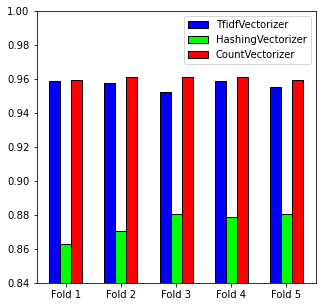

In [39]:
# enter here
import numpy as np
width = 0.2
plt.figure(figsize=(5,5))
x = np.arange(5)
plt.bar(x - width, acc_tv,width, edgecolor='black',color='blue')
plt.bar(x ,acc_hv, width, edgecolor='black',color='lime')
plt.bar(x + width, acc_cv, width, edgecolor='black',color='red')
plt.xticks(x,['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5'])
plt.legend(['TfidfVectorizer', 'HashingVectorizer', 'CountVectorizer'])
plt.ylim(0.84,1)
plt.show()

In [40]:
model.fit(X_trainhv, y_trainhv)

DecisionTreeClassifier()

In [41]:
# labels_predicted = model.predict(X_testhv)
# print(labels_predicted)

In [42]:
input_sen = ['FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv']
inpu = hv.fit_transform(input_sen).toarray()
print(inpu)

[[-0.29488391 -0.29488391  0.         -0.14744196 -0.14744196  0.44232587
   0.         -0.14744196  0.          0.          0.          0.
   0.58976782  0.14744196  0.44232587  0.        ]]


In [43]:
y_pred = model.predict(inpu)
print(y_pred)

[1]
